<a href="https://colab.research.google.com/github/HwnagYujeong0808/BA-Project-Team3/blob/main/BA_project_vif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

---





In [ ]:
energy_df = pd.read_csv('energy_dataset.csv')
weather_df = pd.read_csv('weather_features.csv')

In [ ]:
energy = energy_df.copy()
weather = weather_df.copy()

In [ ]:
energy.head() # show the first 5 rows of energy data

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  generation waste  generation wind offshore  generation wind onshore  \
0  ...             196.0                       0.0                   6378.0   
1  ...             195.0                       0.0                   5890.0   
2  ...             196.0                       0.0                   5461.0   
3  ...             191.0                       0.0                   5238.0   
4  ...             189.0                       0.0                   4935.0   

   forecast solar day ahead  forecast wind offshore eday ahead  \
0                      17.0                                NaN   
1                      16.0                                NaN   
2                       8.0                                NaN   
3                       2.0                                NaN   
4                       9.0                                NaN   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   
2                           5454.0              23515.0            22734.0   
3                           5151.0              22642.0            21286.0   
4                           4861.0              21785.0            20264.0   

   price day ahead  price actual  
0            50.10         65.41  
1            48.10         64.92  
2            47.33         64.48  
3            42.27         59.32  
4            38.41         56.04  

[5 rows x 29 columns]

In [ ]:
energy.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [ ]:
weather.head() # show the first 5 rows pf weather data

dt_iso city_name     temp  temp_min  temp_max  pressure  \
0  2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475    1001.0   
1  2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475    1001.0   
2  2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686    1002.0   
3  2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686    1002.0   
4  2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686    1002.0   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0      77.0         1.0      62.0      0.0      0.0      0.0         0.0   
1      77.0         1.0      62.0      0.0      0.0      0.0         0.0   
2      78.0         0.0      23.0      0.0      0.0      0.0         0.0   
3      78.0         0.0      23.0      0.0      0.0      0.0         0.0   
4      78.0         0.0      23.0      0.0      0.0      0.0         0.0   

   weather_id weather_main weather_description weather_icon  
0       800.0        clear        sky is clear          01n  
1       800.0        clear        sky is clear          01n  
2       800.0        clear        sky is clear          01n  
3       800.0        clear        sky is clear          01n  
4       800.0        clear        sky is clear          01n

In [ ]:
weather.columns

Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

## Check 'NAN'

In [ ]:
energy.isnull().values.any()

True

In [ ]:
weather.isnull().values.any()

True

# Configure Dataset and Data Preprocessing

---
### Weather data configuration
+ 1. Use Madrid city's weather data. (capital of Spain)
+ 2. Use 2018 weather data.
+ 3. Drop duplicate data.

In [ ]:
print(weather.city_name.value_counts())

Madrid        36267
Bilbao        35951
Valencia      35145
 Barcelona    33274
Name: city_name, dtype: int64


In [ ]:
weather.dtypes

dt_iso                  object
city_name               object
temp                   float64
temp_min               float64
temp_max               float64
pressure               float64
humidity               float64
wind_speed             float64
wind_deg               float64
rain_1h                float64
rain_3h                float64
snow_3h                float64
clouds_all             float64
weather_id             float64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

In [ ]:
weather = weather[weather['city_name'] == 'Madrid'] # use the Madrid weather data 스페인 수도
weather = weather.drop(['weather_icon', 'weather_id','weather_description'],axis=1) # drop data that is duplicated and is unneccesity for the training  

In [ ]:
weather.reset_index()
print(weather.dtypes) 

dt_iso           object
city_name        object
temp            float64
temp_min        float64
temp_max        float64
pressure        float64
humidity        float64
wind_speed      float64
wind_deg        float64
rain_1h         float64
rain_3h         float64
snow_3h         float64
clouds_all      float64
weather_main     object
dtype: object


In [ ]:
## Create 'datetime' column which is version of deleting unneccesary part of the 'dt_iso' and make it to index
weather['datetime'] = weather.dt_iso.str.split('+').str[0]
weather = weather.drop(['dt_iso'],axis=1)

In [ ]:
weather = weather.drop(['city_name'],axis=1)
weather

temp  temp_min  temp_max  pressure  humidity  wind_speed  wind_deg  \
35145  267.325   267.325   267.325     971.0      63.0         1.0     309.0   
35146  267.325   267.325   267.325     971.0      63.0         1.0     309.0   
35147  266.186   266.186   266.186     971.0      64.0         1.0     273.0   
35148  266.186   266.186   266.186     971.0      64.0         1.0     273.0   
35149  266.186   266.186   266.186     971.0      64.0         1.0     273.0   
...        ...       ...       ...       ...       ...         ...       ...   
71407  283.560   282.150   285.150    1030.0      88.0         1.0     280.0   
71408  280.120   278.150   281.150    1031.0      52.0         1.0     260.0   
71409  278.150   278.150   278.150    1030.0      65.0         1.0     340.0   
71410  276.570   276.150   277.150    1031.0      69.0         2.0     340.0   
71411  275.150   275.150   275.150    1031.0      74.0         1.0     360.0   

       rain_1h  rain_3h  snow_3h  clouds_all weather_main             datetime  
35145      0.0      0.0      0.0         0.0        clear  2015-01-01 00:00:00  
35146      0.0      0.0      0.0         0.0        clear  2015-01-01 01:00:00  
35147      0.0      0.0      0.0         0.0        clear  2015-01-01 02:00:00  
35148      0.0      0.0      0.0         0.0        clear  2015-01-01 03:00:00  
35149      0.0      0.0      0.0         0.0        clear  2015-01-01 04:00:00  
...        ...      ...      ...         ...          ...                  ...  
71407      0.0      0.0      0.0         0.0        clear  2018-12-31 19:00:00  
71408      0.0      0.0      0.0         0.0        clear  2018-12-31 20:00:00  
71409      0.0      0.0      0.0         0.0        clear  2018-12-31 21:00:00  
71410      0.0      0.0      0.0         0.0        clear  2018-12-31 22:00:00  
71411      0.0      0.0      0.0         0.0        clear  2018-12-31 23:00:00  

[36267 rows x 13 columns]

### Energy data configuration

In [ ]:
energy.dtypes

time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil coal-derived gas             float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation fossil oil shale                    float64
generation fossil peat                         float64
generation geothermal                          float64
generation hydro pumped storage aggregated     float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation marine                              float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation

In [ ]:
energy.isnull().sum(axis=0)

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [ ]:
# Display the rows with null values
energy[energy.isnull().any(axis=1)].tail()

time  generation biomass  \
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   
35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  \
35059                                   0.0   
35060                                   0.0   
35061                                   0.0   
35062                                   0.0   
35063                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
35059                                 0.0                 7634.0   
35060                                 0.0                 7241.0   
35061                                 0.0                 7025.0   
35062                                 0.0                 6562.0   
35063                                 0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation fossil oil shale  generation fossil peat  \
35059                          0.0                     0.0   
35060                          0.0                     0.0   
35061                          0.0                     0.0   
35062                          0.0                     0.0   
35063                          0.0                     0.0   

       generation geothermal  ...  generation waste  generation wind offshore  \
35059                    0.0  ...             277.0                       0.0   
35060                    0.0  ...             280.0                       0.0   
35061                    0.0  ...             286.0                       0.0   
35062                    0.0  ...             287.0                       0.0   
35063                    0.0  ...             287.0                       0.0   

       generation wind onshore  forecast solar day ahead  \
35059                   3113.0                      96.0   
35060                   3288.0                      51.0   
35061                   3503.0                      36.0   
35062                   3586.0                      29.0   
35063                   3651.0                      26.0   

       forecast wind offshore eday ahead  forecast wind onshore day ahead  \
35059                                NaN                           3253.0   
35060                                NaN                           3353.0   
35061                                NaN                           3404.0   
35062                                NaN                           3273.0   
35063                                NaN                           3117.0   

       total load forecast  total load actual  price day ahead  price actual  
35059              30619.0            30653.0            68.85         77.02  
35060              29932.0            29735.0            68.40         76.16  
35061              27903.0            28071.0            66.88         74.30  
35062              25450.0            25801.0            63.93         69.89  
35063              24424.0            24455.0            64.27         69.88  

[5 rows x 29 columns]

In [ ]:
# Fill null values using interpolation
energy.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [ ]:
energy.isnull().sum(axis=0)

time                                               0
generation biomass                                 0
generation fossil brown coal/lignite               0
generation fossil coal-derived gas                 0
generation fossil gas                              0
generation fossil hard coal                        0
generation fossil oil                              0
generation fossil oil shale                        0
generation fossil peat                             0
generation geothermal                              0
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption        0
generation hydro run-of-river and poundage         0
generation hydro water reservoir                   0
generation marine                                  0
generation nuclear                                 0
generation other                                   0
generation other renewable                         0
generation solar                              

In [ ]:
energy.reset_index()

index                       time  generation biomass  \
0          0  2015-01-01 00:00:00+01:00               447.0   
1          1  2015-01-01 01:00:00+01:00               449.0   
2          2  2015-01-01 02:00:00+01:00               448.0   
3          3  2015-01-01 03:00:00+01:00               438.0   
4          4  2015-01-01 04:00:00+01:00               428.0   
...      ...                        ...                 ...   
35059  35059  2018-12-31 19:00:00+01:00               297.0   
35060  35060  2018-12-31 20:00:00+01:00               296.0   
35061  35061  2018-12-31 21:00:00+01:00               292.0   
35062  35062  2018-12-31 22:00:00+01:00               293.0   
35063  35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  \
0                                     329.0   
1                                     328.0   
2                                     323.0   
3                                     254.0   
4                                     187.0   
...                                     ...   
35059                                   0.0   
35060                                   0.0   
35061                                   0.0   
35062                                   0.0   
35063                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
0                                     0.0                 4844.0   
1                                     0.0                 5196.0   
2                                     0.0                 4857.0   
3                                     0.0                 4314.0   
4                                     0.0                 4130.0   
...                                   ...                    ...   
35059                                 0.0                 7634.0   
35060                                 0.0                 7241.0   
35061                                 0.0                 7025.0   
35062                                 0.0                 6562.0   
35063                                 0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
0                           4821.0                  162.0   
1                           4755.0                  158.0   
2                           4581.0                  157.0   
3                           4131.0                  160.0   
4                           3840.0                  156.0   
...                            ...                    ...   
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation fossil oil shale  generation fossil peat  ...  \
0                              0.0                     0.0  ...   
1                              0.0                     0.0  ...   
2                              0.0                     0.0  ...   
3                              0.0                     0.0  ...   
4                              0.0                     0.0  ...   
...                            ...                     ...  ...   
35059                          0.0                     0.0  ...   
35060                          0.0                     0.0  ...   
35061                          0.0                     0.0  ...   
35062                          0.0                     0.0  ...   
35063                          0.0                     0.0  ...   

       generation waste  generation wind offshore  generation wind onshore  \
0                 196.0                       0.0                   6378.0   
1                 195.0                       0.0                   5890.0   
2                 196.0                       0.0                   5461.0   
3                 

In [ ]:
## Create 'datetime' column which is version of deleting unneccesary part of the 'dt_iso' and make it to index
energy['datetime'] = energy.time.str.split('+').str[0]
energy = energy.drop(['time'],axis=1)

In [ ]:
energy

generation biomass  generation fossil brown coal/lignite  \
0                   447.0                                 329.0   
1                   449.0                                 328.0   
2                   448.0                                 323.0   
3                   438.0                                 254.0   
4                   428.0                                 187.0   
...                   ...                                   ...   
35059               297.0                                   0.0   
35060               296.0                                   0.0   
35061               292.0                                   0.0   
35062               293.0                                   0.0   
35063               290.0                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
0                                     0.0                 4844.0   
1                                     0.0                 5196.0   
2                                     0.0                 4857.0   
3                                     0.0                 4314.0   
4                                     0.0                 4130.0   
...                                   ...                    ...   
35059                                 0.0                 7634.0   
35060                                 0.0                 7241.0   
35061                                 0.0                 7025.0   
35062                                 0.0                 6562.0   
35063                                 0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
0                           4821.0                  162.0   
1                           4755.0                  158.0   
2                           4581.0                  157.0   
3                           4131.0                  160.0   
4                           3840.0                  156.0   
...                            ...                    ...   
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation fossil oil shale  generation fossil peat  \
0                              0.0                     0.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   
...                            ...                     ...   
35059                          0.0                     0.0   
35060                          0.0                     0.0   
35061                          0.0                     0.0   
35062                          0.0                     0.0   
35063                          0.0                     0.0   

       generation geothermal  generation hydro pumped storage aggregated  ...  \
0                        0.0                                         NaN  ...   
1                        0.0                                         NaN  ...   
2                        0.0                                         NaN  ...   
3                        0.0                                         NaN  ...   
4                        0.0                                         NaN  ...   
...                      ...                                         ...  ...   
35059                    0.0                                         NaN  ...   
35060                    0.0                                         NaN  ...   
35061                    0.0                                         NaN  ...   
35062                    0.0                                         NaN  ...   
35063           

### Data Cleaning and Mergy dataset

In [ ]:
energy.shape # check shape of energy data

(35064, 29)

In [ ]:
weather.shape # check shape of weather data

(36267, 13)

In [ ]:
energy.eq(0).sum().to_frame(name="zero values") # check zero value

zero values
generation biomass                                     4
generation fossil brown coal/lignite               10524
generation fossil coal-derived gas                 35064
generation fossil gas                                  1
generation fossil hard coal                            3
generation fossil oil                                  3
generation fossil oil shale                        35064
generation fossil peat                             35064
generation geothermal                              35064
generation hydro pumped storage aggregated             0
generation hydro pumped storage consumption        12614
generation hydro run-of-river and poundage             3
generation hydro water reservoir                       3
generation marine                                  35064
generation nuclear                                     3
generation other                                       4
generation other renewable                             3
generation solar                                       3
generation waste                                       3
generation wind offshore                           35064
generation wind onshore                                3
forecast solar day ahead                             539
forecast wind offshore eday ahead                      0
forecast wind onshore day ahead                        0
total load forecast                                    0
total load actual                                      0
price day ahead                                        0
price actual                                           0
datetime                                               0

In [ ]:
energy.drop(["generation fossil coal-derived gas",
                  "generation fossil oil shale",
                  "generation fossil peat",
                  "generation geothermal",
                  "generation marine",
                  "generation hydro pumped storage aggregated",
                  "generation wind offshore",
                  "forecast wind offshore eday ahead"],
                 axis=1,
                 inplace=True)

In [ ]:
# 동일한 시간을 merge 하기 위해 duplicate data 제거 -> 행 개수 맞춤
energy = energy.drop_duplicates(subset="datetime", keep="first")
energy.shape

(35060, 21)

In [ ]:
weather = weather.drop_duplicates(subset="datetime", keep="first")
weather.shape

(35060, 13)

In [ ]:
full = pd.merge(energy, weather, on='datetime')

In [ ]:
full_df = full.copy()

In [ ]:
## Create year, month, day, hour, day_name column
full_df['datetime']= pd.to_datetime(full_df['datetime'])
full_df['year'] = full_df['datetime'].dt.year
full_df['month'] = full_df['datetime'].dt.month
full_df['day'] = full_df['datetime'].dt.day
full_df['hour'] = full_df['datetime'].dt.hour
full_df['day_name'] = full_df['datetime'].dt.day_name()
full_df = full_df.set_index('datetime')

In [ ]:
full_df.head()

generation biomass  generation fossil brown coal/lignite  \
datetime                                                                        
2015-01-01 00:00:00               447.0                                 329.0   
2015-01-01 01:00:00               449.0                                 328.0   
2015-01-01 02:00:00               448.0                                 323.0   
2015-01-01 03:00:00               438.0                                 254.0   
2015-01-01 04:00:00               428.0                                 187.0   

                     generation fossil gas  generation fossil hard coal  \
datetime                                                                  
2015-01-01 00:00:00                 4844.0                       4821.0   
2015-01-01 01:00:00                 5196.0                       4755.0   
2015-01-01 02:00:00                 4857.0                       4581.0   
2015-01-01 03:00:00                 4314.0                       4131.0   
2015-01-01 04:00:00                 4130.0                       3840.0   

                     generation fossil oil  \
datetime                                     
2015-01-01 00:00:00                  162.0   
2015-01-01 01:00:00                  158.0   
2015-01-01 02:00:00                  157.0   
2015-01-01 03:00:00                  160.0   
2015-01-01 04:00:00                  156.0   

                     generation hydro pumped storage consumption  \
datetime                                                           
2015-01-01 00:00:00                                        863.0   
2015-01-01 01:00:00                                        920.0   
2015-01-01 02:00:00                                       1164.0   
2015-01-01 03:00:00                                       1503.0   
2015-01-01 04:00:00                                       1826.0   

                     generation hydro run-of-river and poundage  \
datetime                                                          
2015-01-01 00:00:00                                      1051.0   
2015-01-01 01:00:00                                      1009.0   
2015-01-01 02:00:00                                       973.0   
2015-01-01 03:00:00                                       949.0   
2015-01-01 04:00:00                                       953.0   

                     generation hydro water reservoir  generation nuclear  \
datetime                                                                    
2015-01-01 00:00:00                            1899.0              7096.0   
2015-01-01 01:00:00                            1658.0              7096.0   
2015-01-01 02:00:00                            1371.0              7099.0   
2015-01-01 03:00:00                             779.0              7098.0   
2015-01-01 04:00:00                             720.0              7097.0   

                     generation other  ...  rain_1h  rain_3h  snow_3h  \
datetime                               ...                              
2015-01-01 00:00:00              43.0  ...      0.0      0.0      0.0   
2015-01-01 01:00:00              43.0  ...      0.0      0.0      0.0   
2015-01-01 02:00:00              43.0  ...      0.0      0.0      0.0   
2015-01-01 03:00:00              43.0  ...      0.0      0.0      0.0   
2015-01-01 04:00:00              43.0  ...      0.0      0.0      0.0   

                     clouds_all  weather_main  year  month  day  hour  \
datetime                                                                
2015-01-01 00:00:00         0.0         clear  2015      1    1     0   
2015-01-01 01:00:00         0.0         clear  2015      1    1     1   
2015-01-01 02:00:00         0.0         clear  2015      1    1     2   
2015-01-01 03:00:00         0.0         clear  2015      1    1     3   
2015-01-01 04:00:00         0.0         clear  2015      1    1     4   

                     day_name  
datetime                       
2015-01-01 00:00:00  Thursday

In [ ]:
full_df.dtypes

generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation solar                               float64
generation waste                               float64
generation wind onshore                        float64
forecast solar day ahead                       float64
forecast wind onshore day ahead                float64
total load forecast                            float64
total load actual                              float64
price day 

# Exploratory Data Analysis (EDA) 

## 1. Overall Data Analysis

In [ ]:
full_df = full_df[full_df['price actual'].notna()] # delete N/A value in price(final target variable) actual column

In [ ]:
full_df = full_df = full_df.drop(['weather_main', 'day_name'],axis=1) # drop object type data

## 2. Observation of individual attribute values of data

## Energy

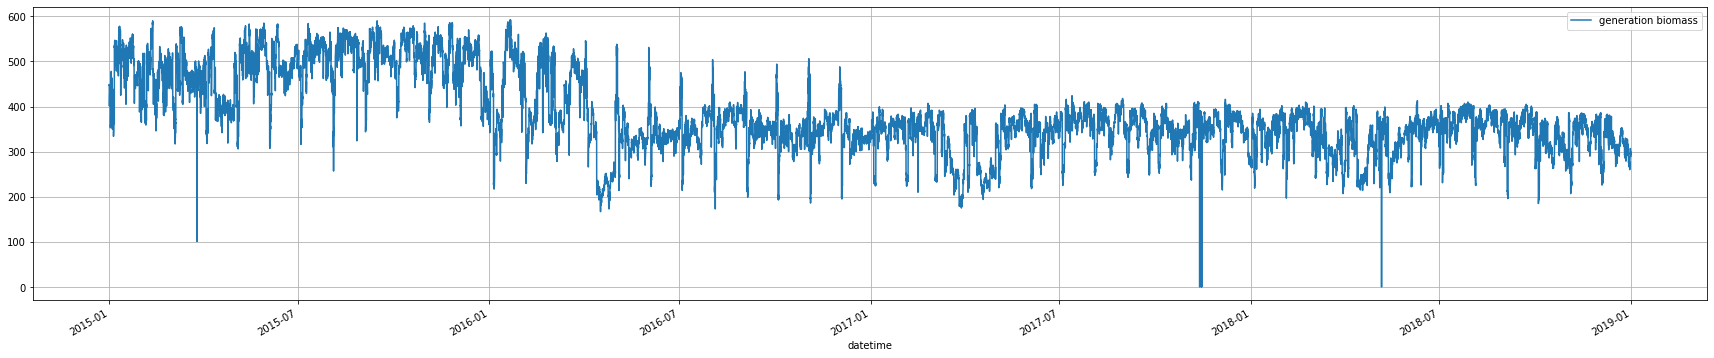

In [ ]:
full_df.plot(y=['generation biomass'], figsize=(30, 6), grid=True)

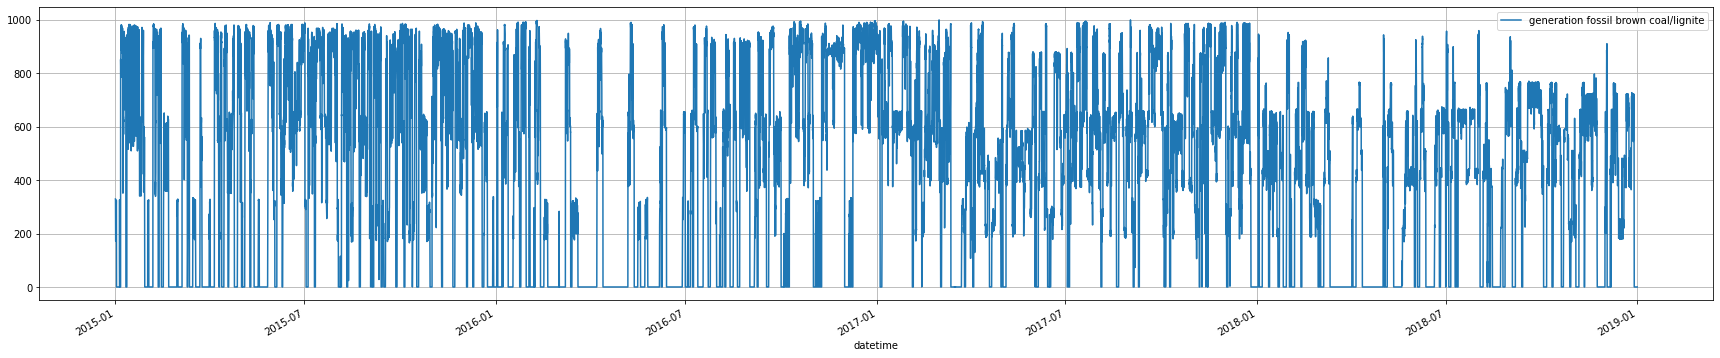

In [ ]:
full_df.plot(y=['generation fossil brown coal/lignite'], figsize=(30, 6), grid=True)

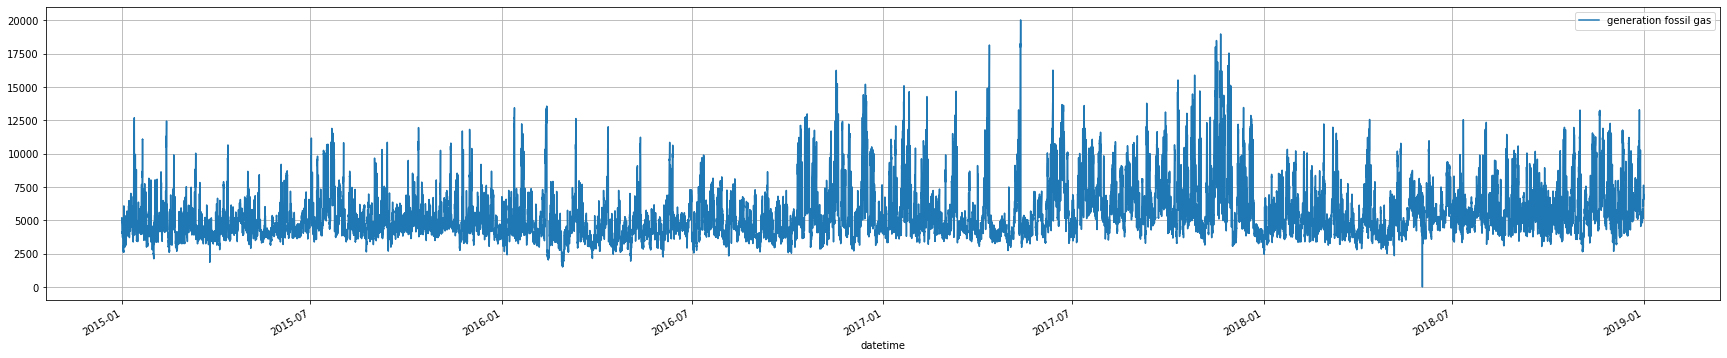

In [ ]:
full_df.plot(y=['generation fossil gas'], figsize=(30, 6), grid=True)

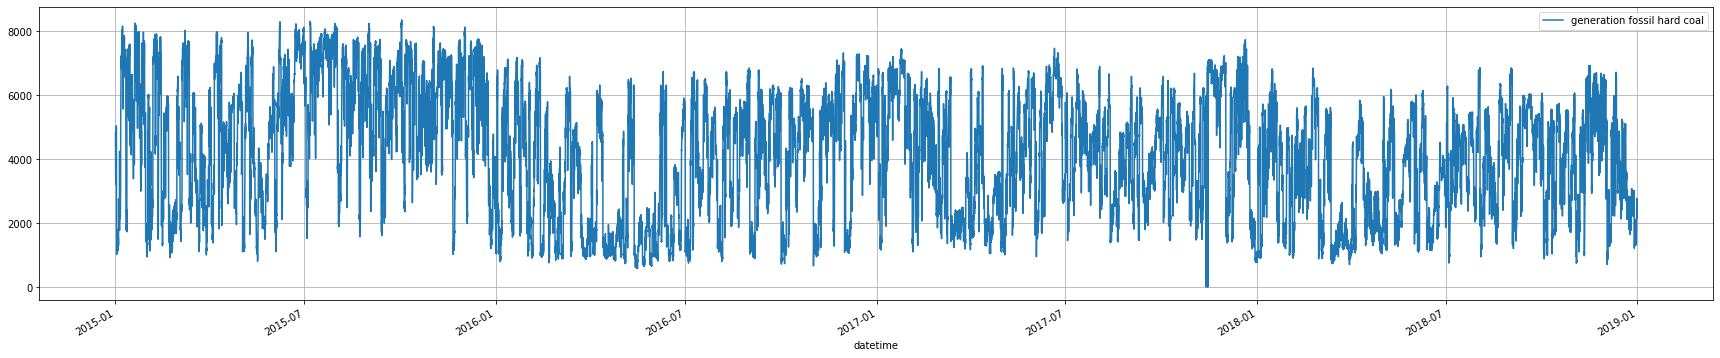

In [ ]:
full_df.plot(y=['generation fossil hard coal'], figsize=(30, 6), grid=True)

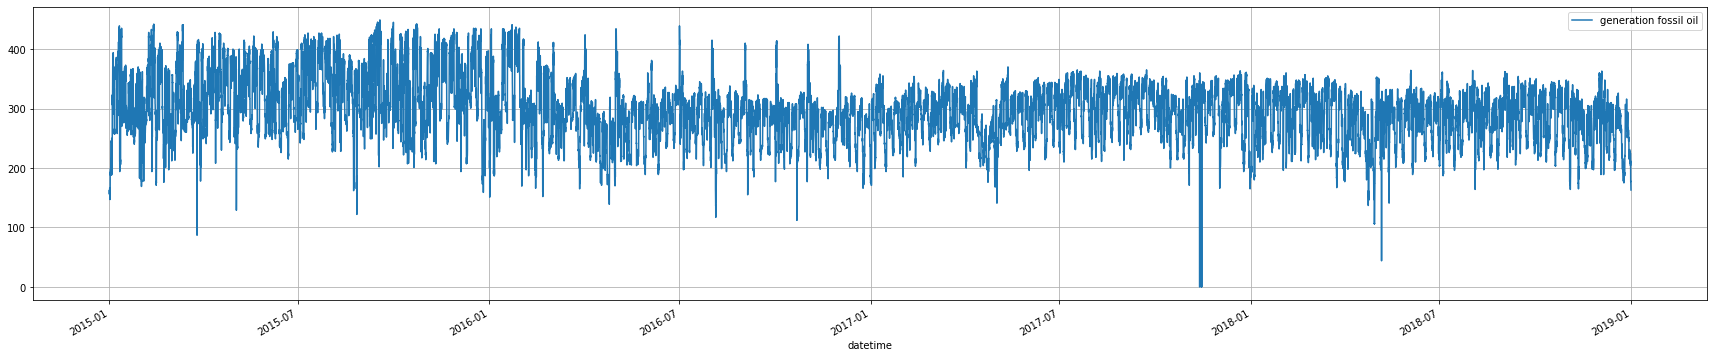

In [ ]:
full_df.plot(y=['generation fossil oil'], figsize=(30,6), grid=True)

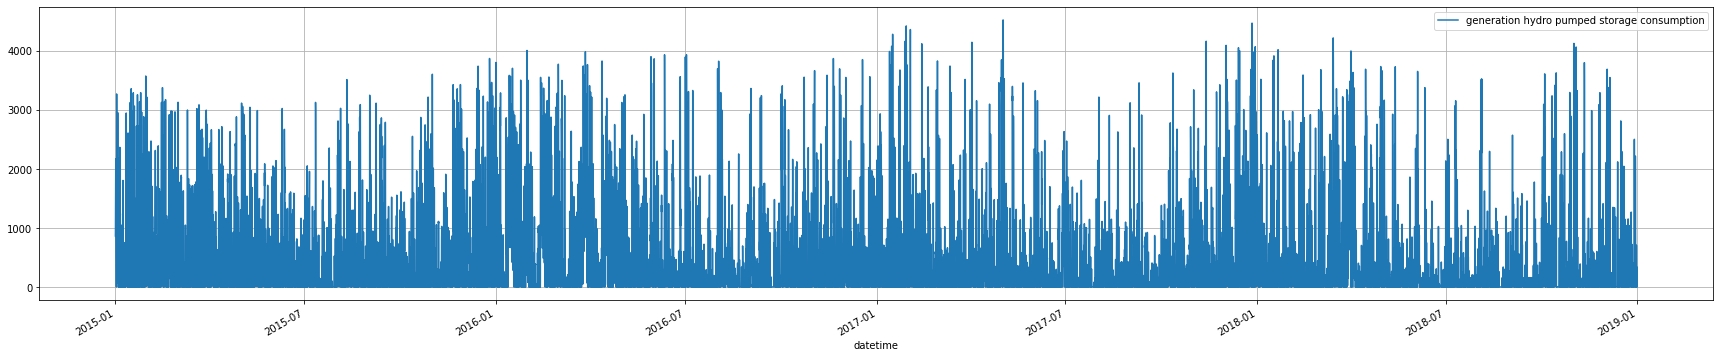

In [ ]:
full_df.plot(y=['generation hydro pumped storage consumption'], figsize=(30,6), grid=True)


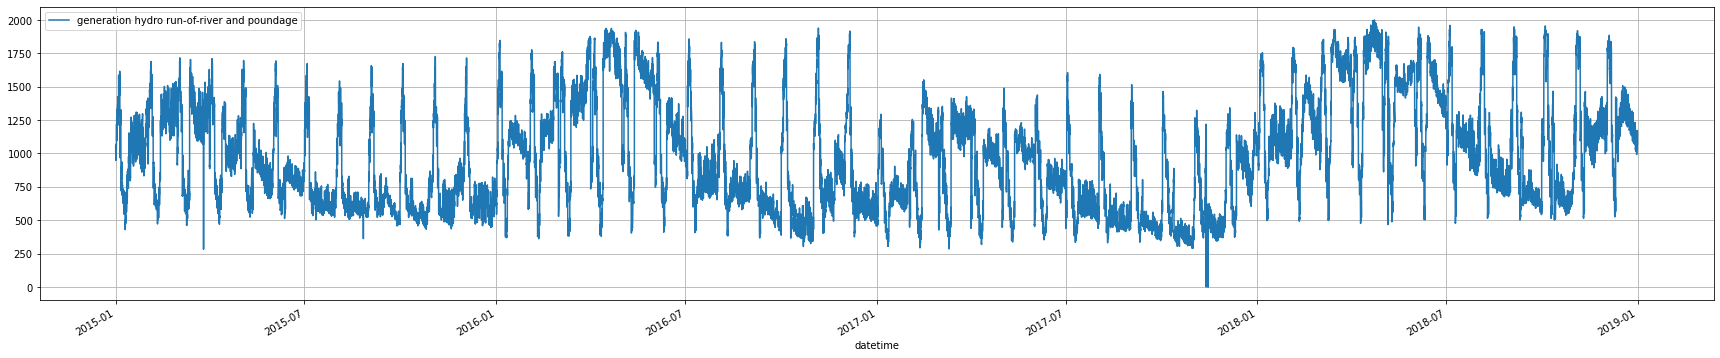

In [ ]:
full_df.plot(y=['generation hydro run-of-river and poundage'], figsize=(30,6), grid=True)

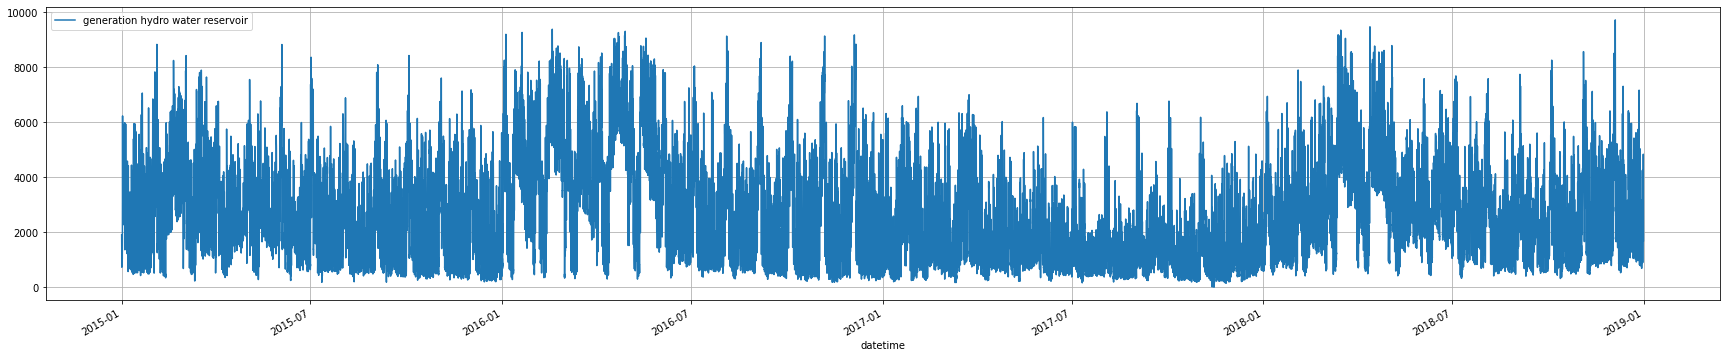

In [ ]:
full_df.plot(y=['generation hydro water reservoir'], figsize=(30,6), grid=True)

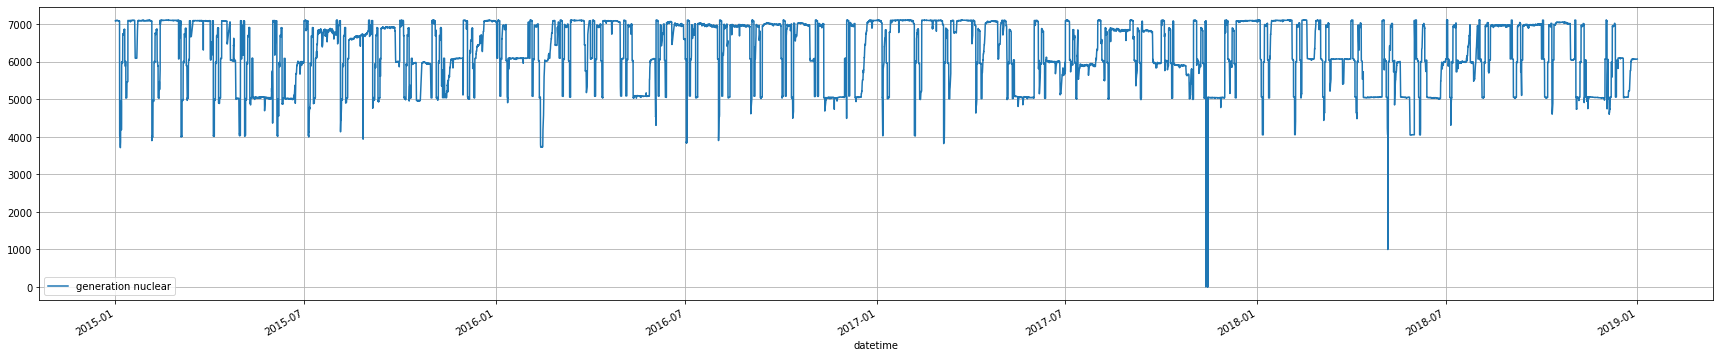

In [ ]:
full_df.plot(y=['generation nuclear'], figsize=(30,6), grid=True)

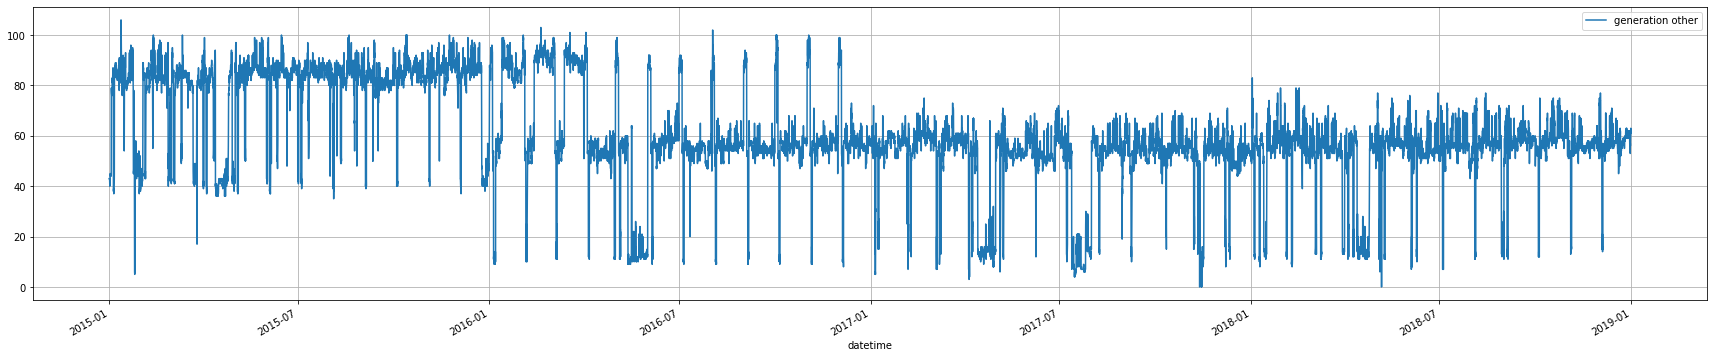

In [ ]:
full_df.plot(y=['generation other'], figsize=(30,6), grid=True)

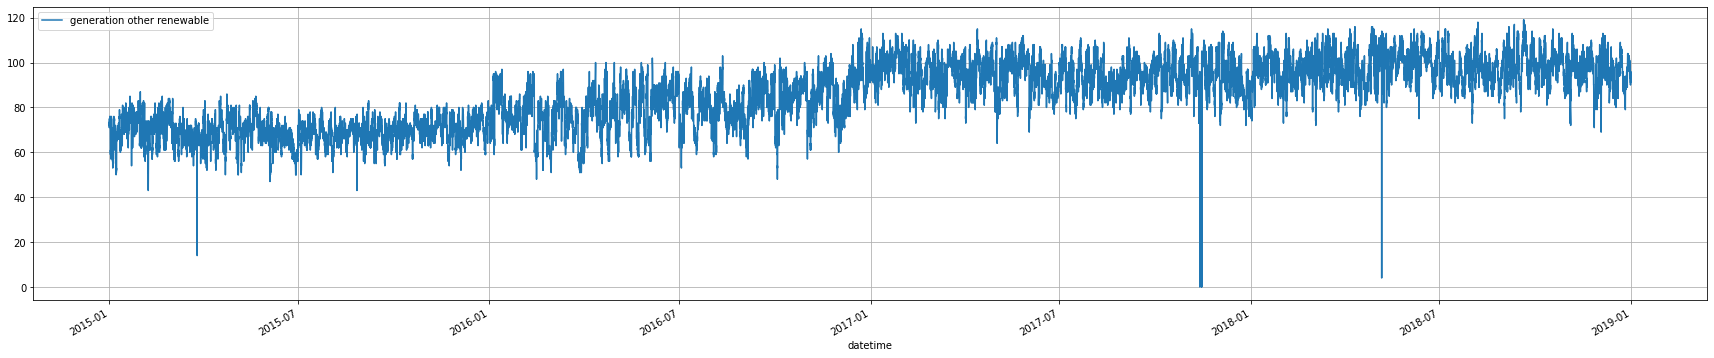

In [ ]:
full_df.plot(y=['generation other renewable'], figsize=(30,6), grid=True)

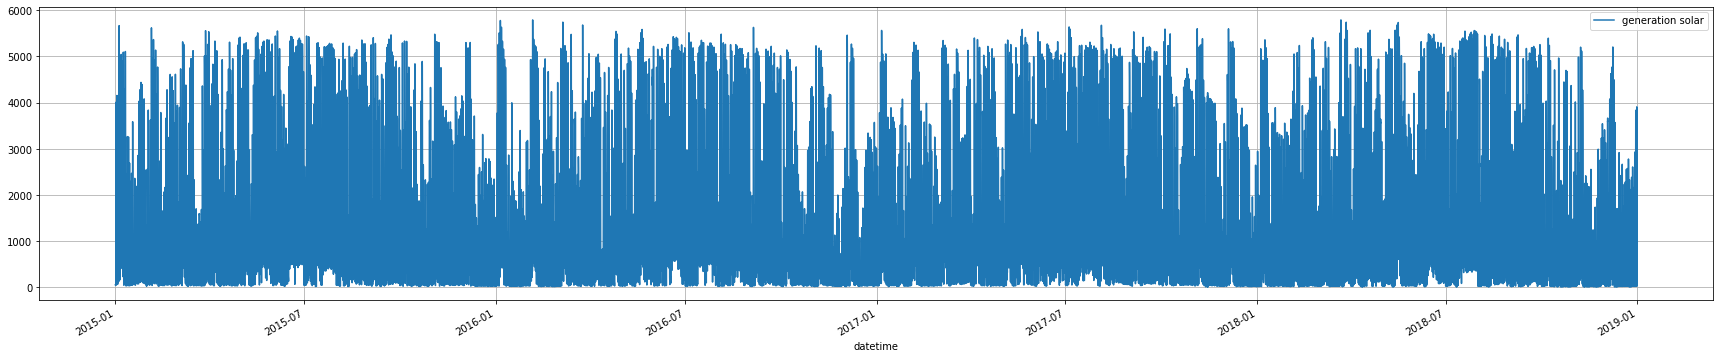

In [ ]:
full_df.plot(y=['generation solar'], figsize=(30,6), grid=True)

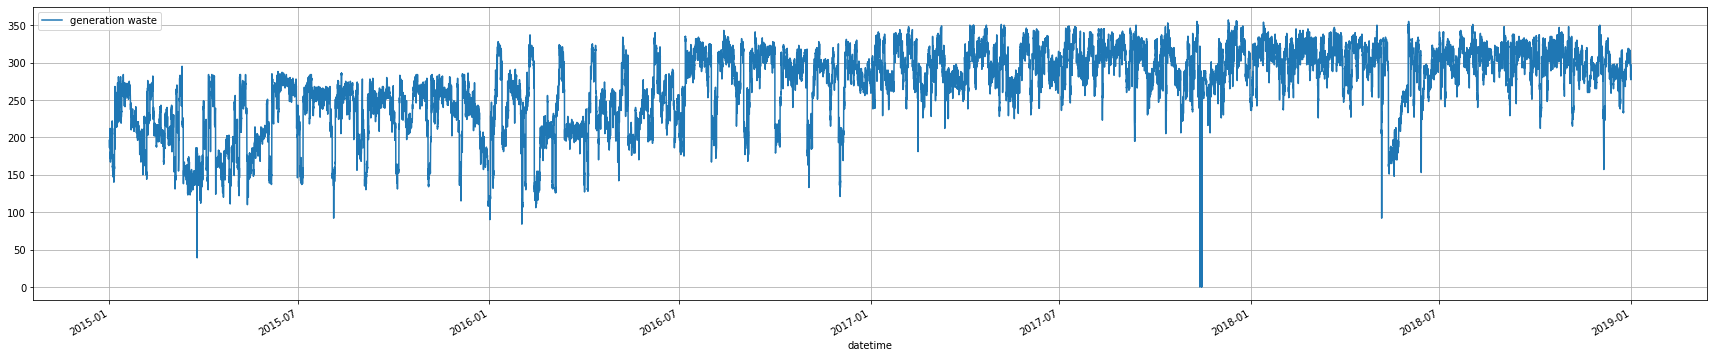

In [ ]:
full_df.plot(y=['generation waste'], figsize=(30,6), grid=True)

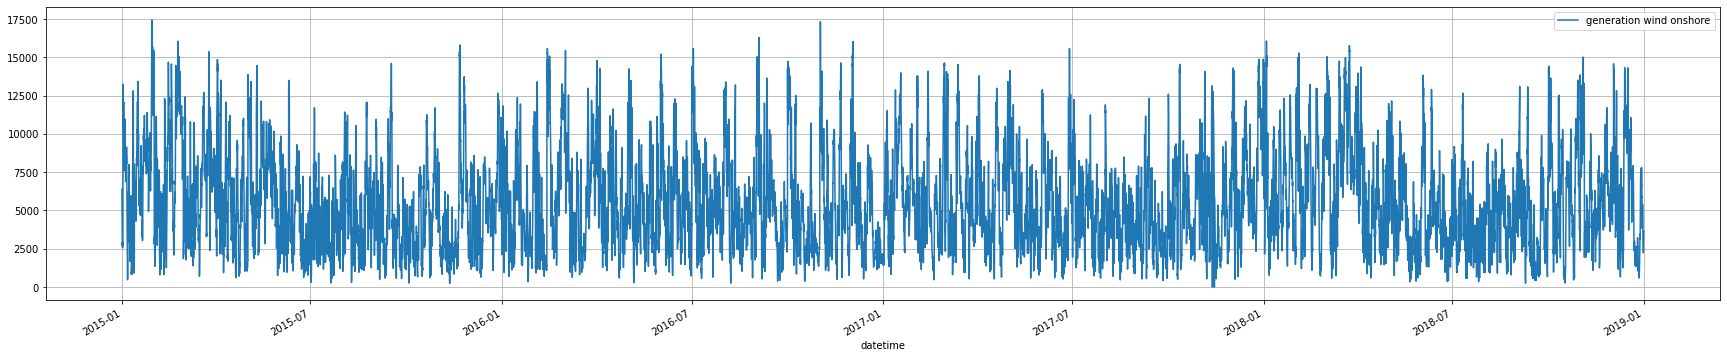

In [ ]:
full_df.plot(y=['generation wind onshore'], figsize=(30,6), grid=True)

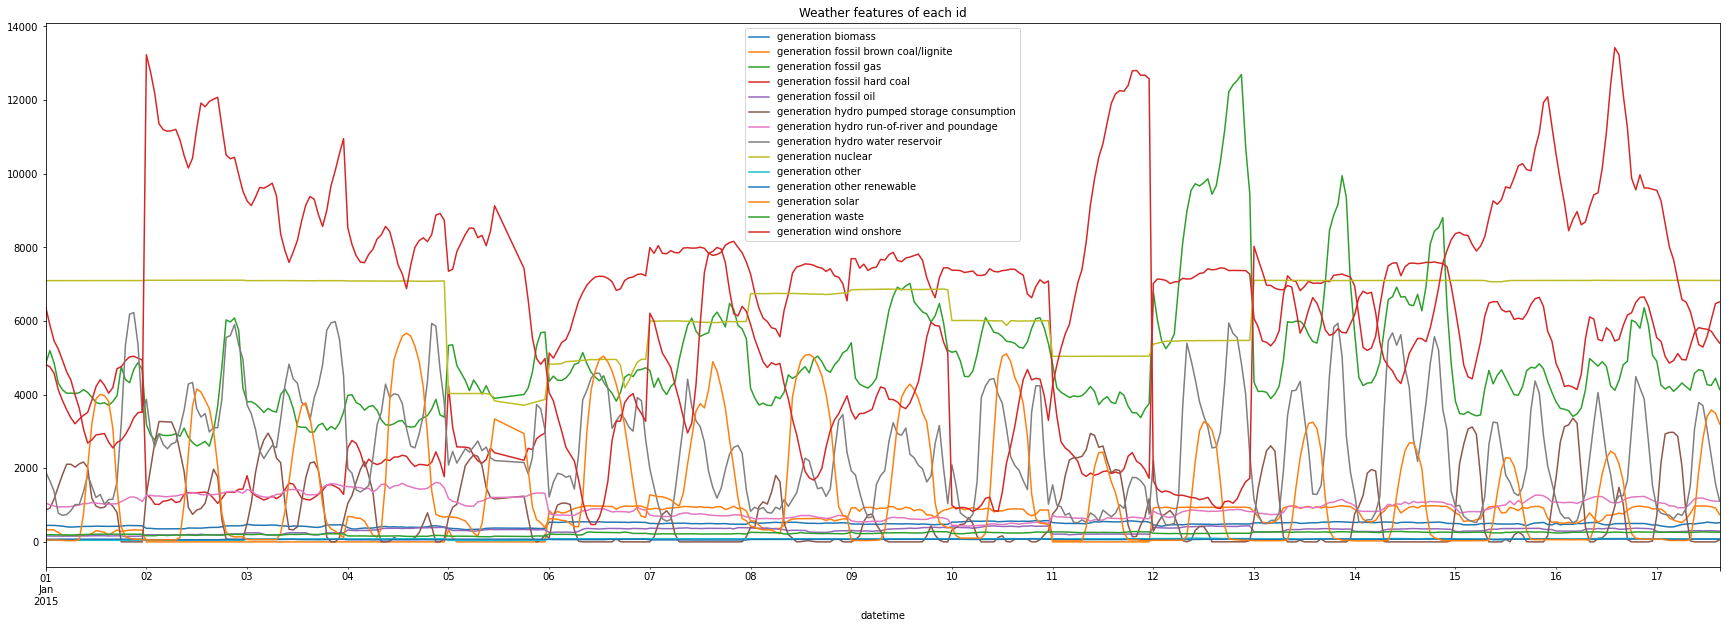

In [ ]:
# to see the energy generation distribution
full_df_energy = full_df[['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas','generation fossil hard coal' ,
                   'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 
                   'generation nuclear' ,'generation other','generation other renewable','generation solar', 'generation waste','generation wind onshore']]
full_df_energy[:400].plot(figsize=(30,10),title='Weather features of each id')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

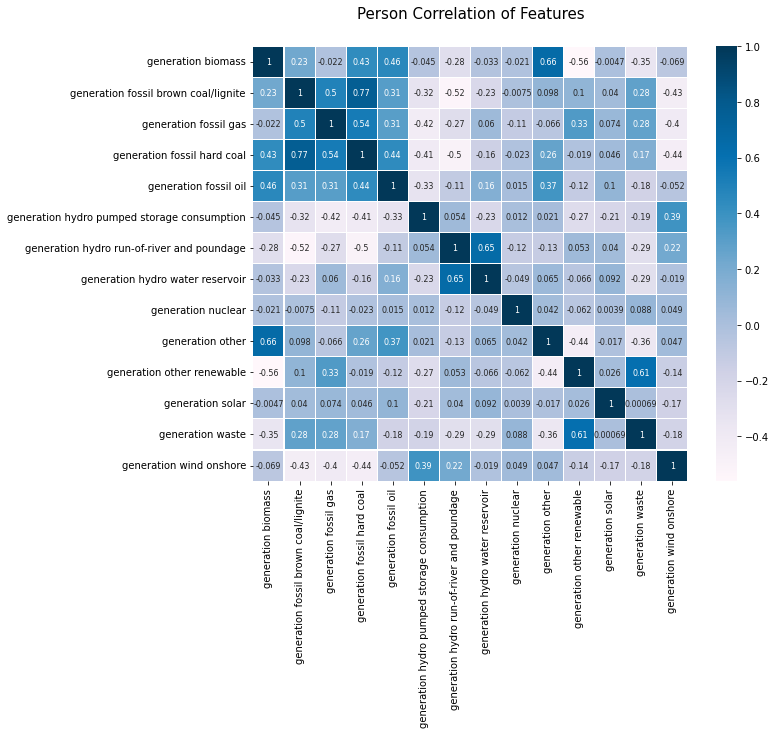

In [ ]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(full_df_energy.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 8})

## Weather

In [ ]:
full_df.dtypes

generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation solar                               float64
generation waste                               float64
generation wind onshore                        float64
forecast solar day ahead                       float64
forecast wind onshore day ahead                float64
total load forecast                            float64
total load actual                              float64
price day 

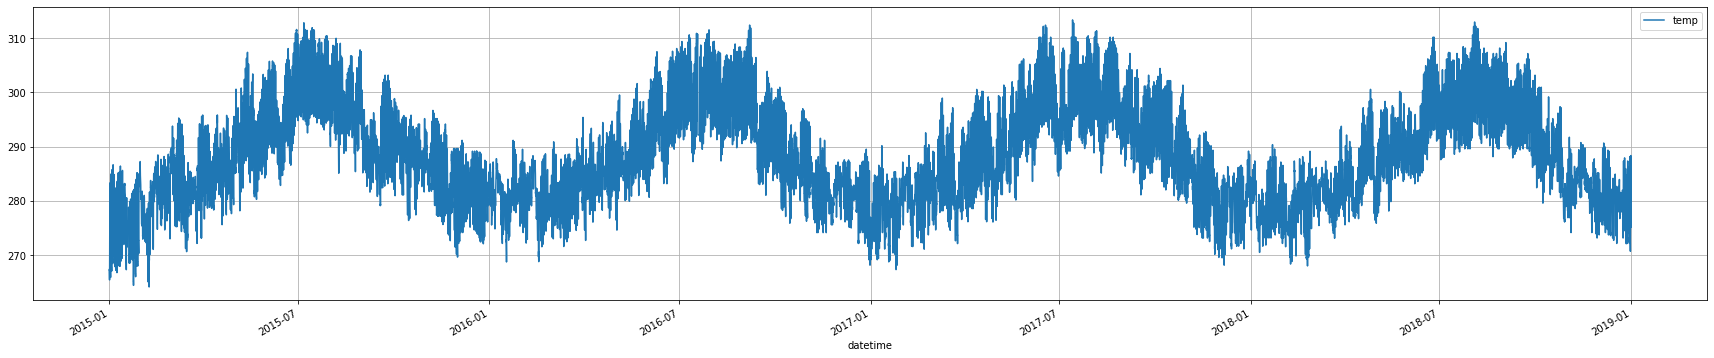

In [ ]:
full_df.plot(y=['temp'], figsize=(30, 6), grid=True)

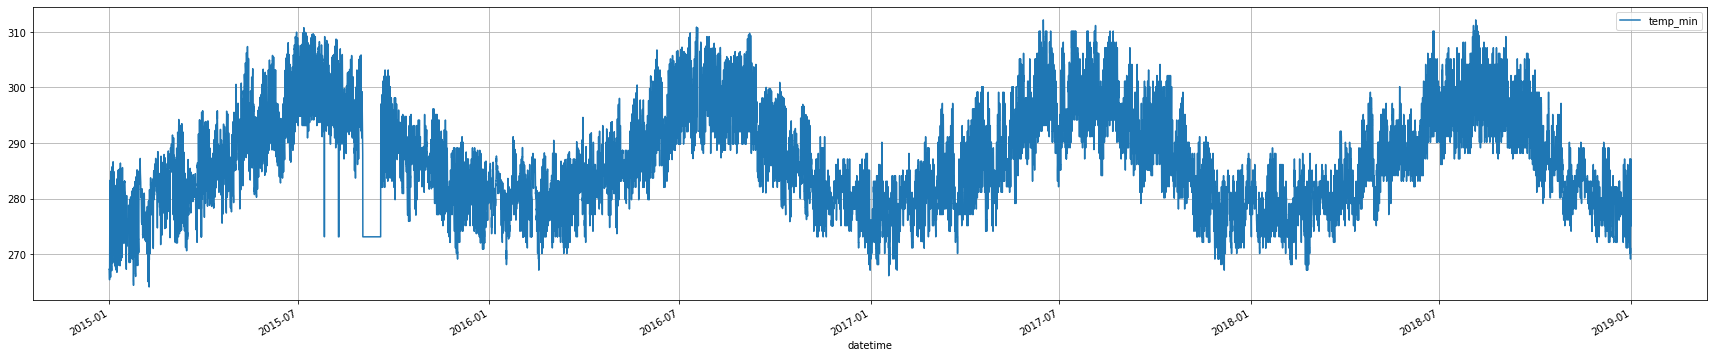

In [ ]:
full_df.plot(y=['temp_min'], figsize=(30, 6), grid=True)

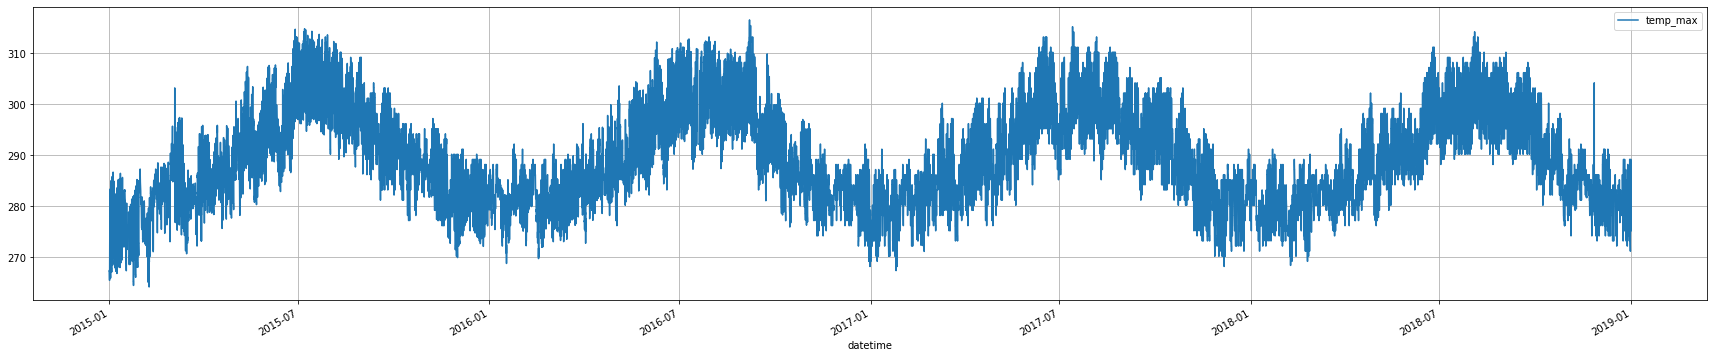

In [ ]:
full_df.plot(y=['temp_max'], figsize=(30, 6), grid=True)

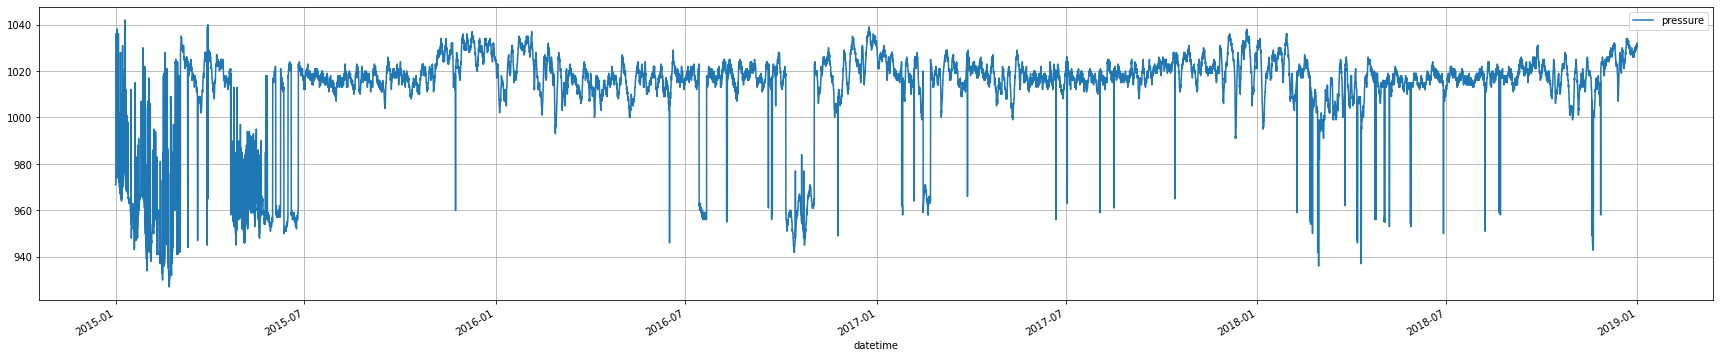

In [ ]:
full_df.plot(y=['pressure'], figsize=(30, 6), grid=True)

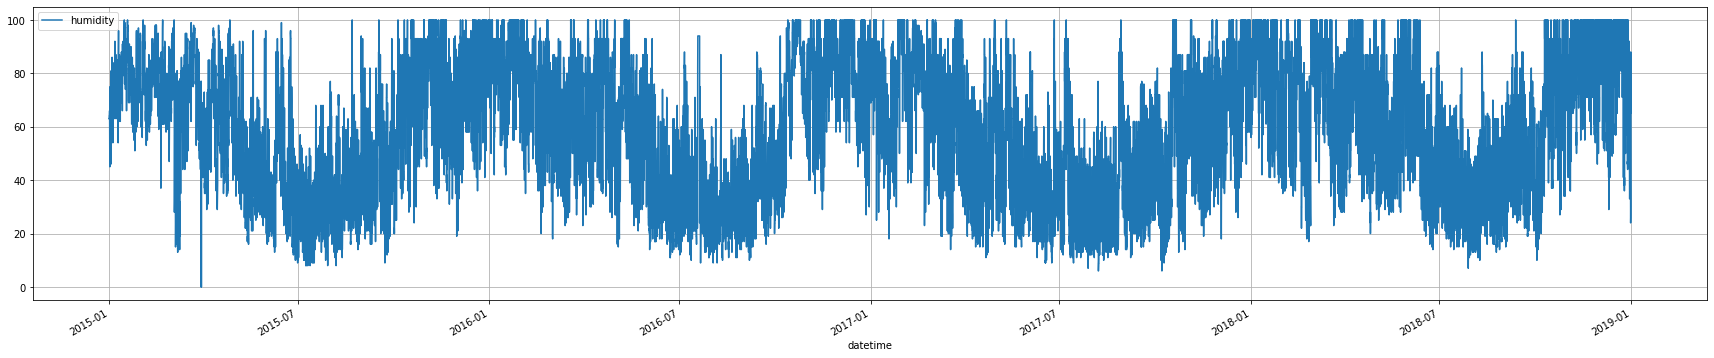

In [ ]:
full_df.plot(y=['humidity'], figsize=(30, 6), grid=True)

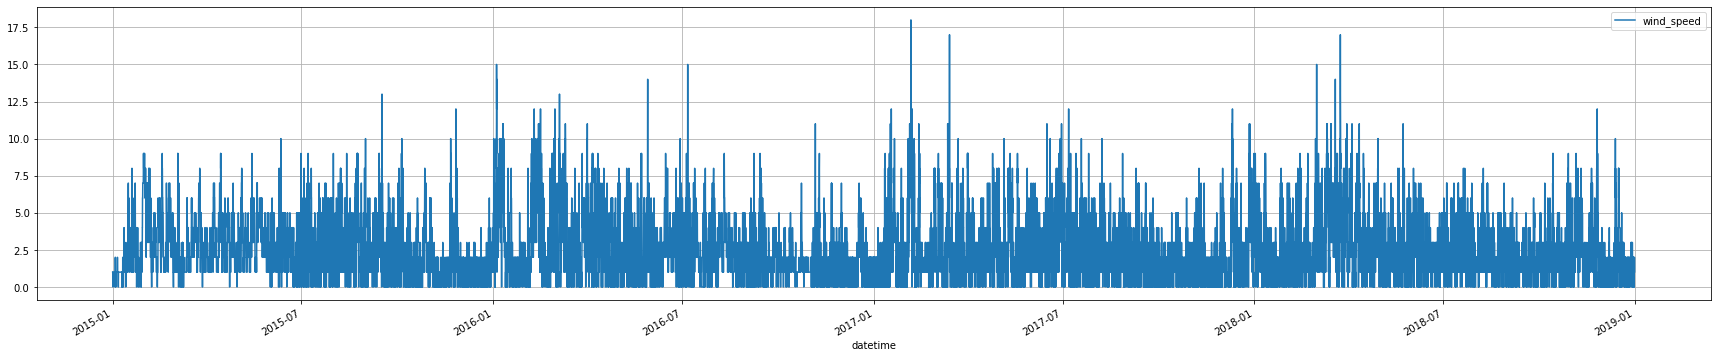

In [ ]:
full_df.plot(y=['wind_speed'], figsize=(30, 6), grid=True)

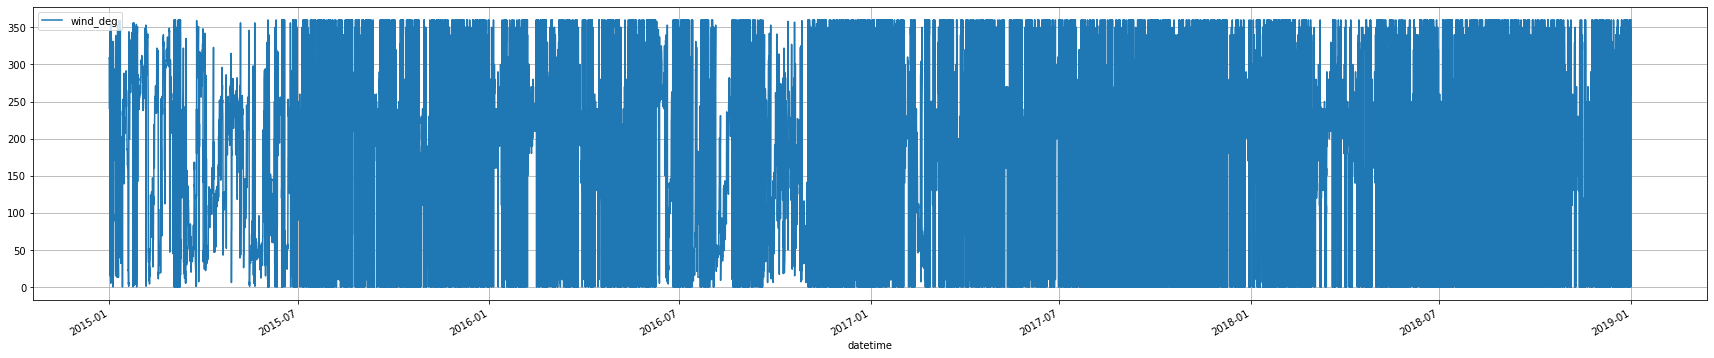

In [ ]:
full_df.plot(y=['wind_deg'], figsize=(30, 6), grid=True)

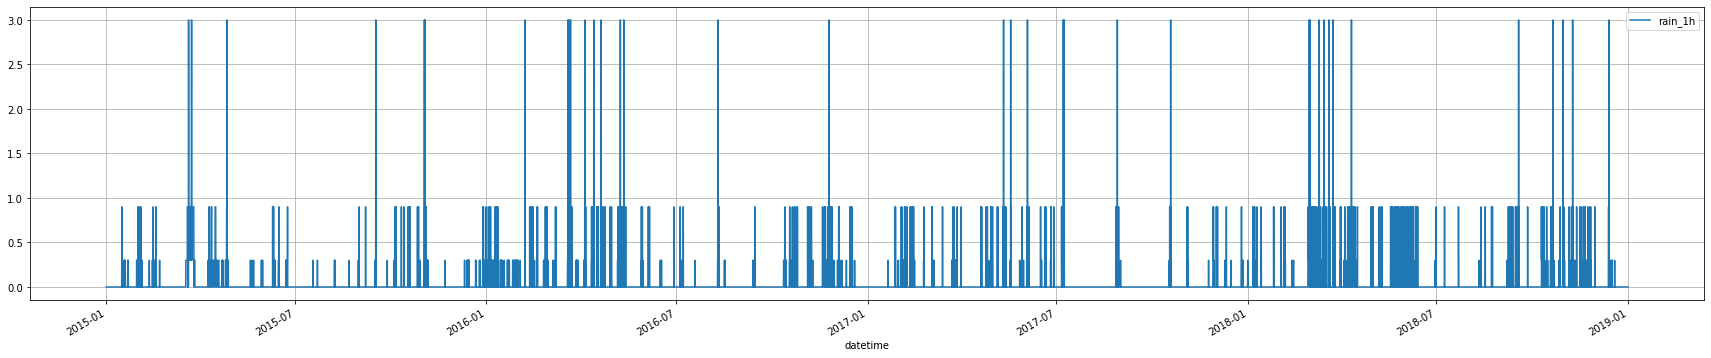

In [ ]:
full_df.plot(y=['rain_1h'], figsize=(30, 6), grid=True)

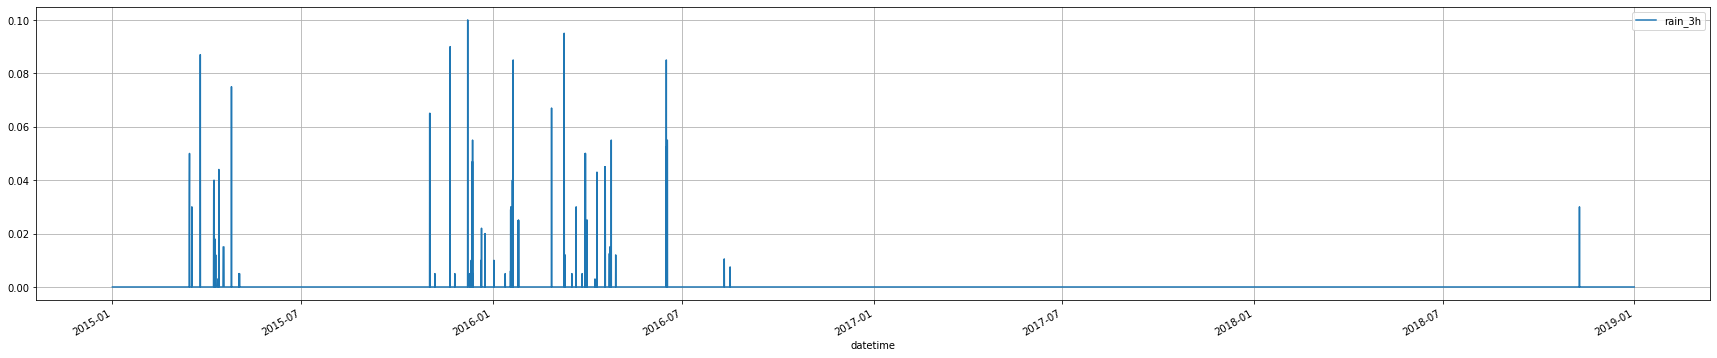

In [ ]:
full_df.plot(y=['rain_3h'], figsize=(30, 6), grid=True)

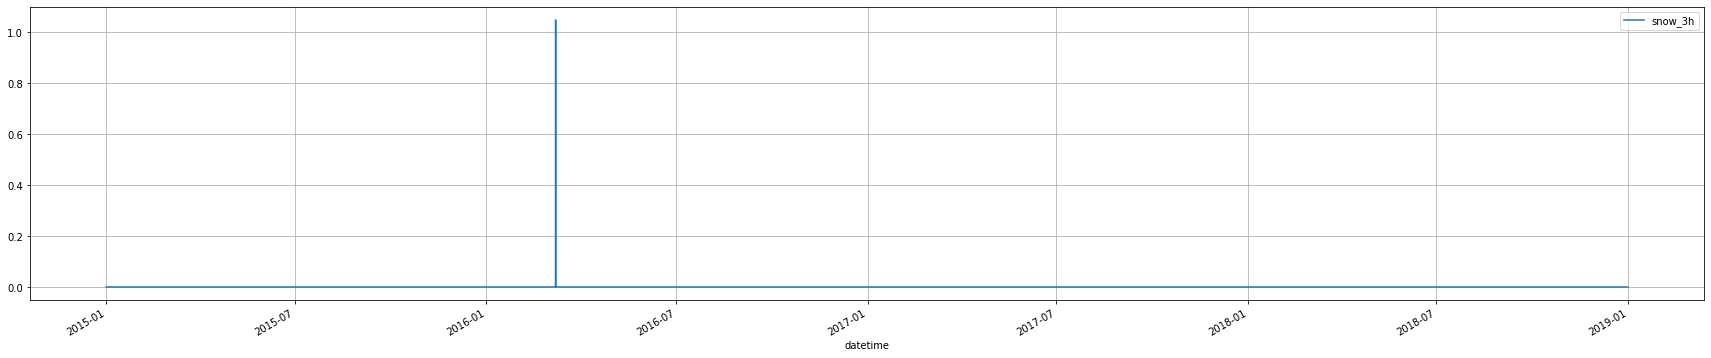

In [ ]:
full_df.plot(y=['snow_3h'], figsize=(30, 6), grid=True)

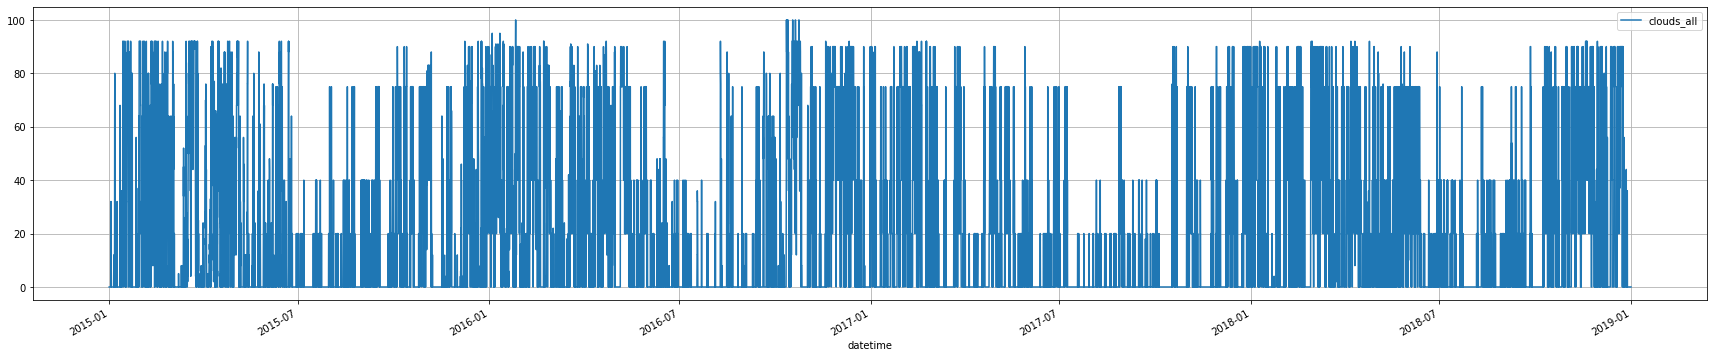

In [ ]:
full_df.plot(y=['clouds_all'], figsize=(30, 6), grid=True)

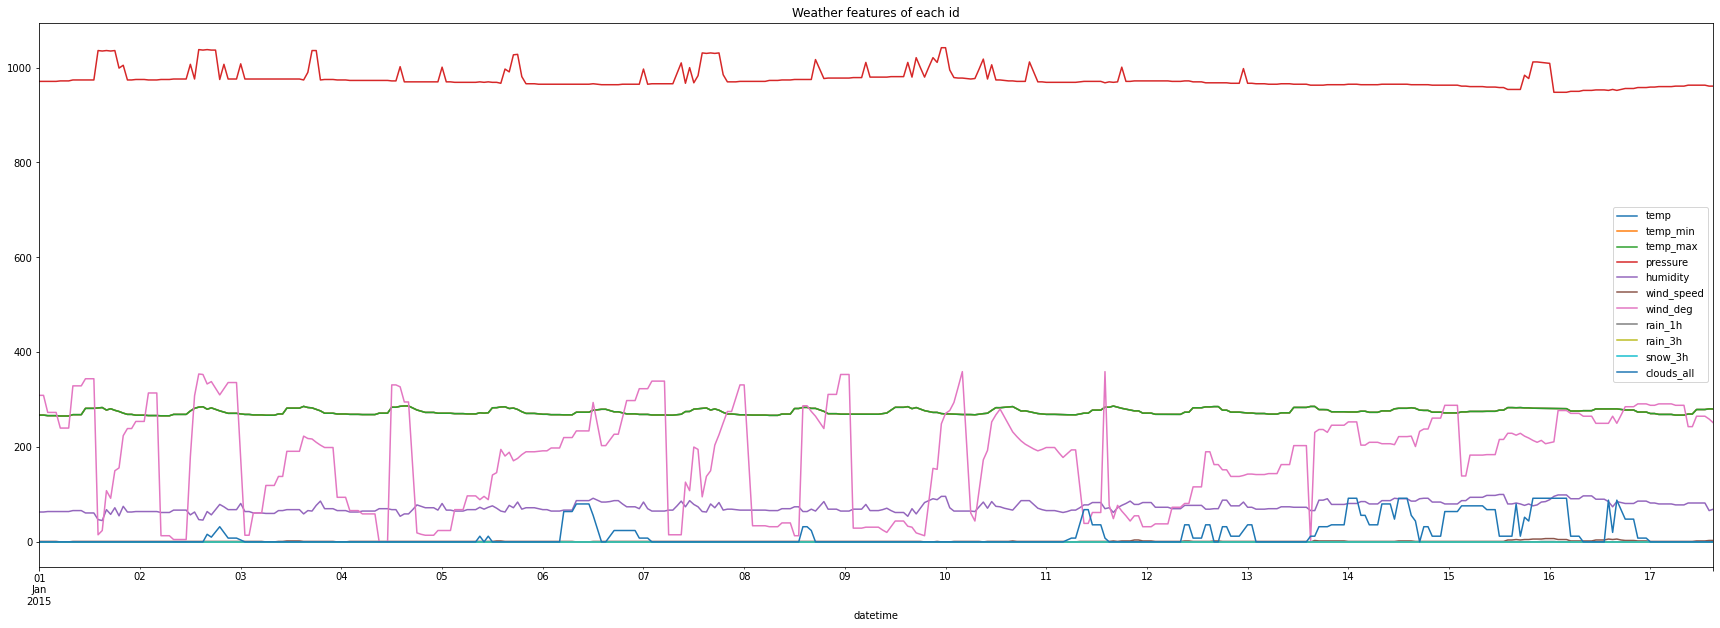

In [ ]:
full_df_weather=full_df[['temp','temp_min','temp_max','pressure', 'humidity' ,'wind_speed','wind_deg', 'rain_1h',
                         'rain_3h','snow_3h' ,'clouds_all']]
full_df_weather[:400].plot(figsize=(30,10),title='Weather features of each id')

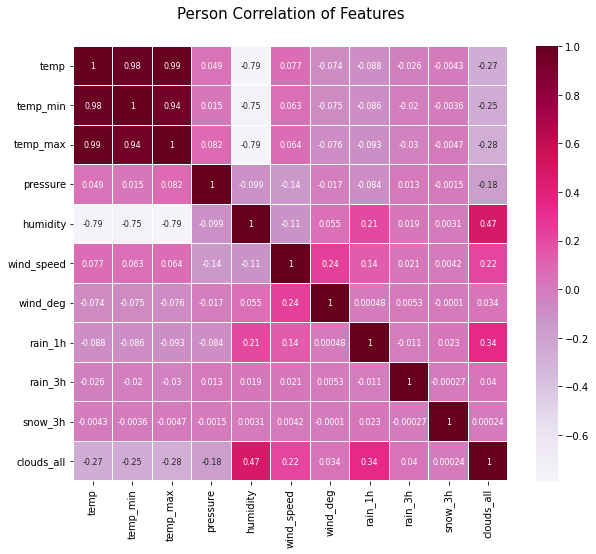

In [ ]:
colormap = plt.cm.PuRd
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(full_df_weather.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 8})


## 3. Find correlation between generated energy type and 'price'

In [ ]:
# Identify the correlation between the target variable and the input variable and select the top 10
data_corr = full_df.corr()
data_corr = data_corr.sort_values(by=['price actual'],axis=1, ascending=False)
data_corr = data_corr.iloc[range(20),0]
data_corr = data_corr.sort_values(ascending = False)
data_corr = data_corr.iloc[0:20]
print(data_corr)

price actual                                   1.000000
price day ahead                                0.732151
generation fossil hard coal                    0.465643
generation fossil gas                          0.461448
total load forecast                            0.435888
total load actual                              0.435283
generation fossil brown coal/lignite           0.364008
generation fossil oil                          0.285051
generation other renewable                     0.255562
generation waste                               0.168723
generation biomass                             0.142696
forecast solar day ahead                       0.101379
generation other                               0.099931
generation solar                               0.098505
generation hydro water reservoir               0.071874
generation nuclear                            -0.053036
generation hydro run-of-river and poundage    -0.136723
generation wind onshore                       -0

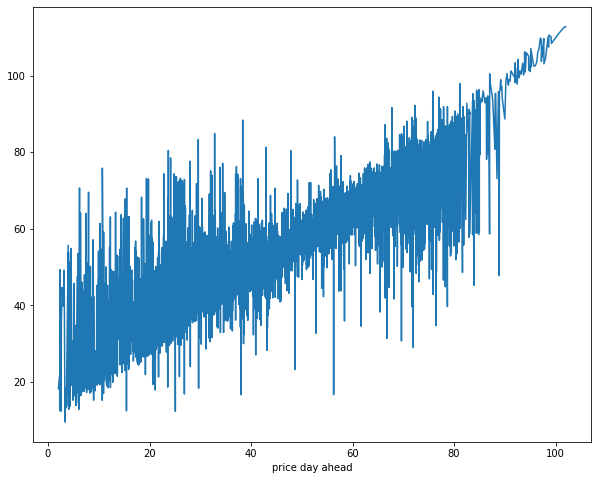

In [ ]:
# plot for price day ahead  
fig = plt.figure(figsize=(10,8))
full_df.groupby('price day ahead')['price actual'].mean().plot() # since price day ahead is prediction for the actual price, I will remove this column.

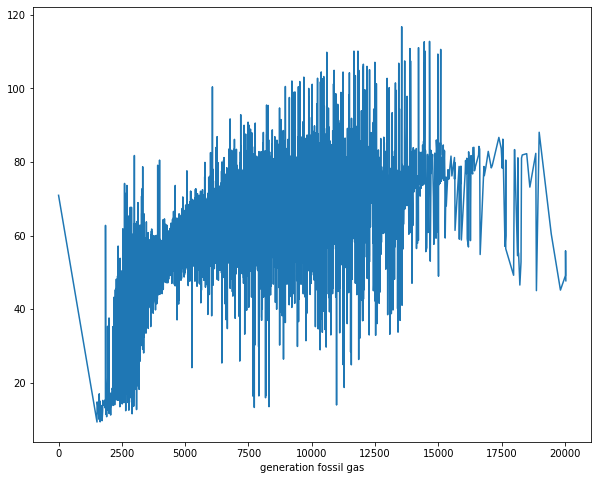

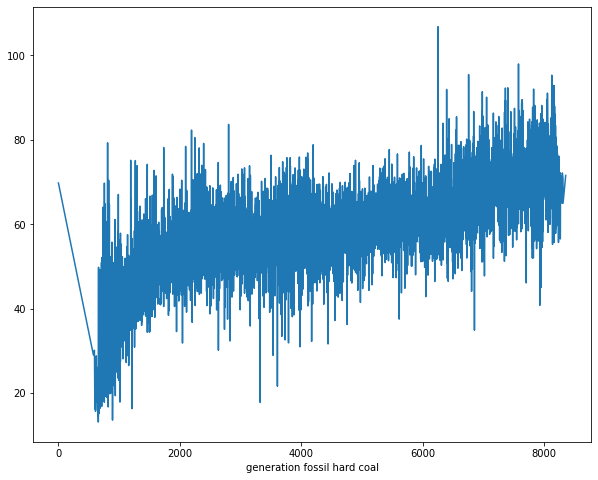

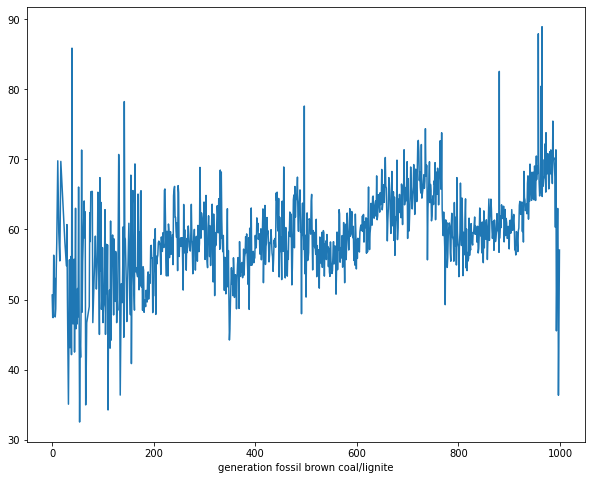

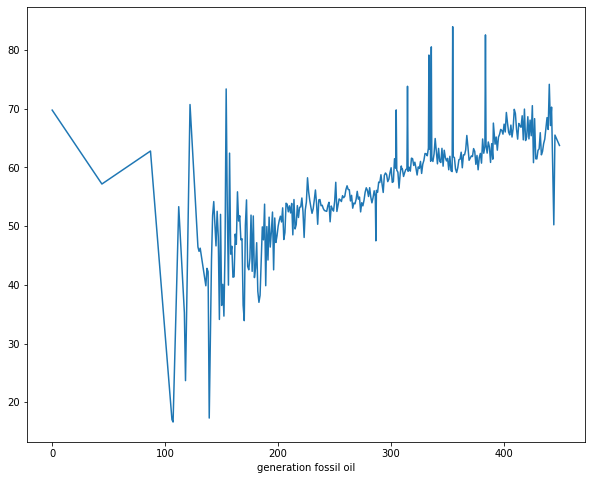

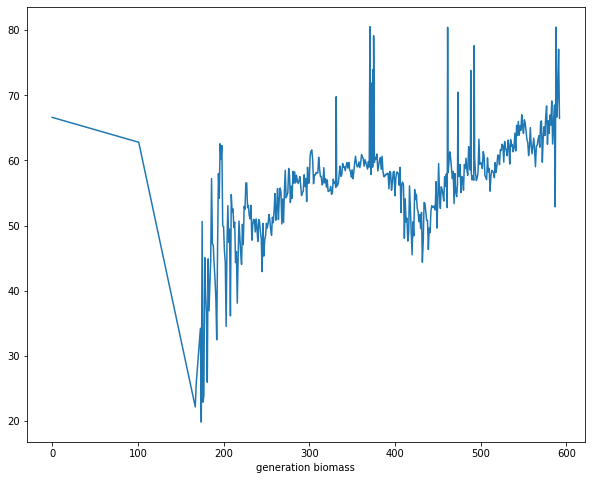

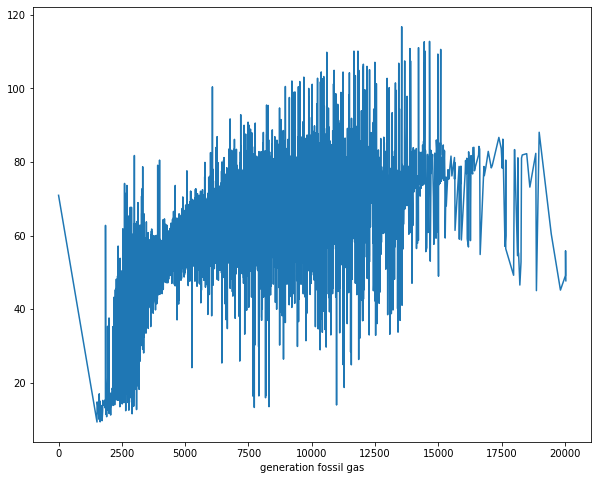

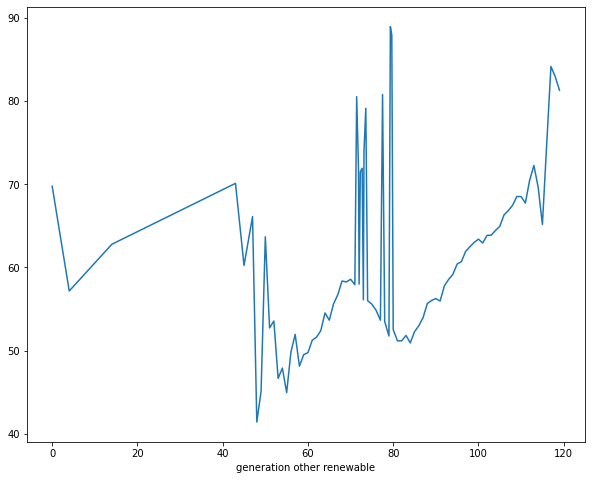

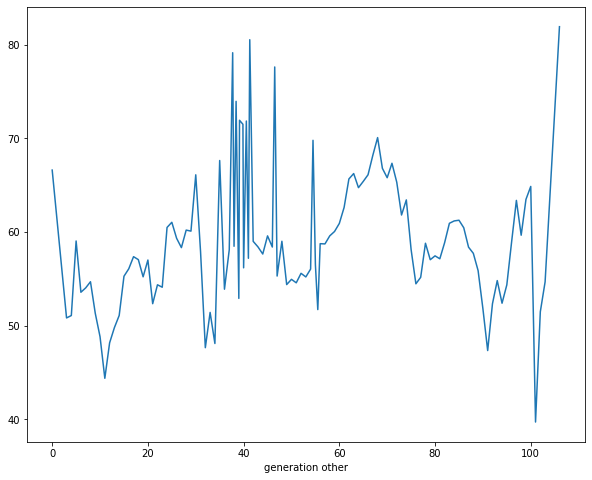

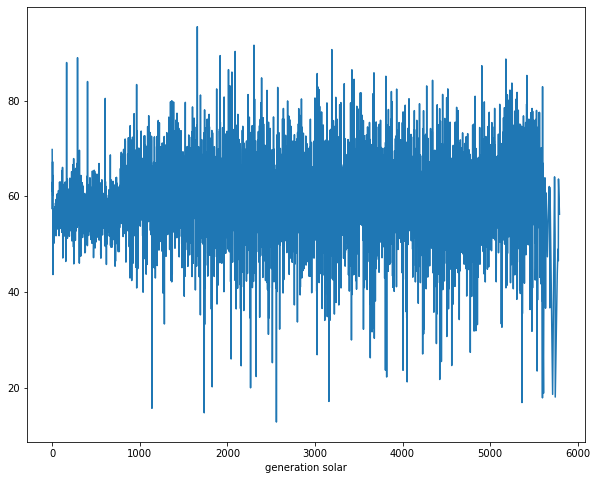

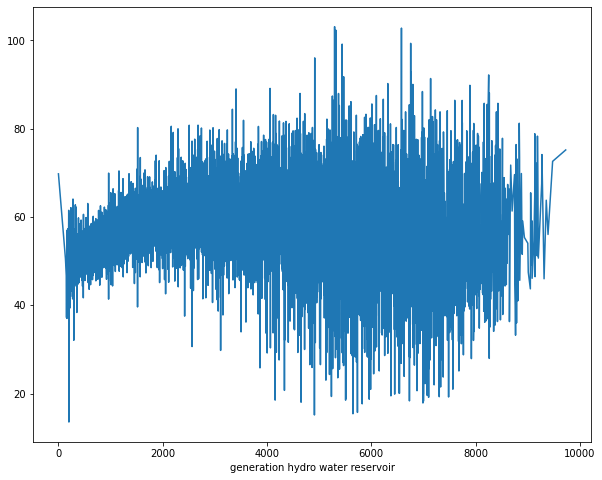

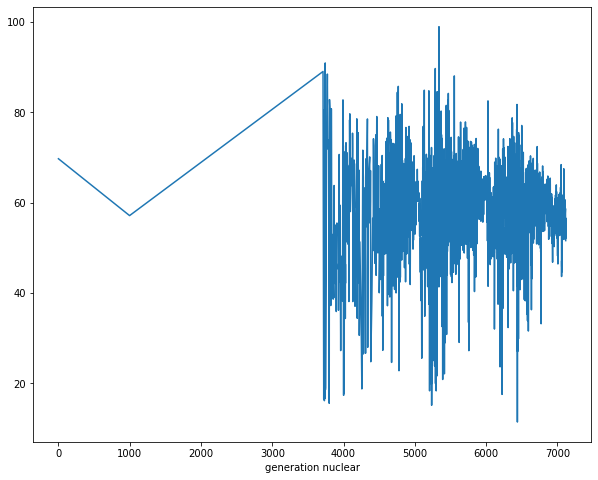

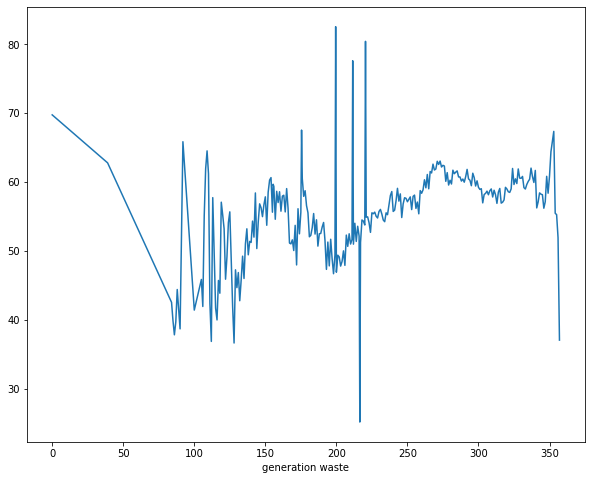

In [ ]:
# plot for generation fossil gas 
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation fossil gas')['price actual'].mean().plot()

# plot for generation fossil hard coal 
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation fossil hard coal')['price actual'].mean().plot()

# plot for generation fossil brown coal/lignite
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation fossil brown coal/lignite')['price actual'].mean().plot()

# plot for generation fossil oil
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation fossil oil')['price actual'].mean().plot()

# plot for generation biomass
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation biomass')['price actual'].mean().plot()

# plot for generation fossil gas 
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation fossil gas')['price actual'].mean().plot()

# plot for generation other renewable
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation other renewable')['price actual'].mean().plot()

# plot for generation other
fig = plt.figure(figsize=(10,8))
energy.groupby('generation other')['price actual'].mean().plot()

# plot for generation solar 
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation solar')['price actual'].mean().plot()

# plot for generation hydro water reservoir
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation hydro water reservoir')['price actual'].mean().plot()

# plot for generation nuclear
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation nuclear')['price actual'].mean().plot()

# plot for generation waste
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation waste')['price actual'].mean().plot()

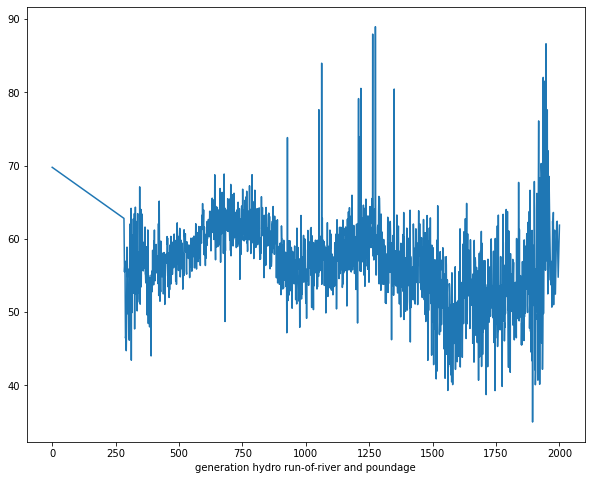

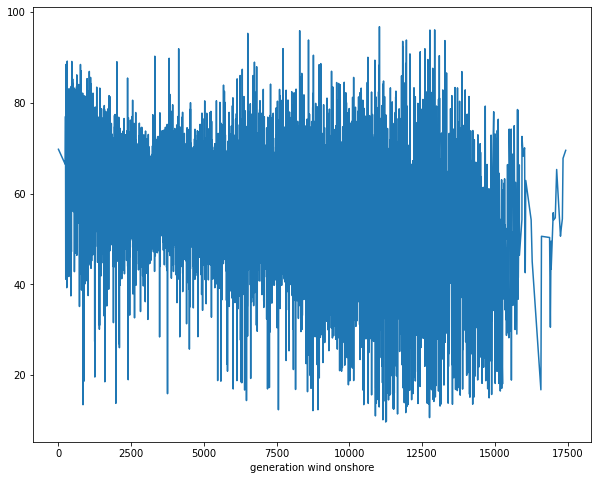

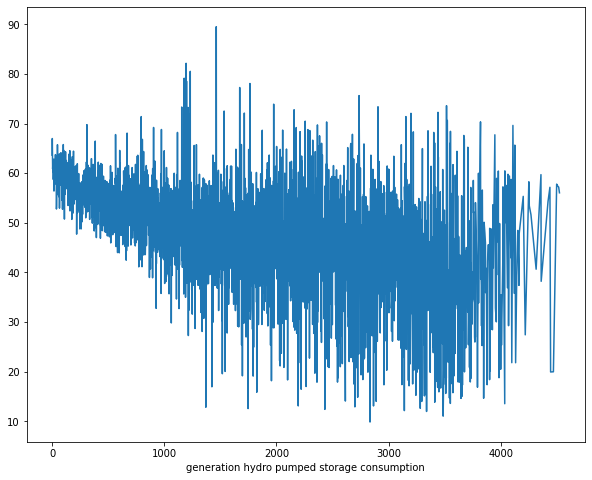

In [ ]:
# plot for generation hydro run-of-river and poundage
fig = plt.figure(figsize=(10,8))
energy.groupby('generation hydro run-of-river and poundage')['price actual'].mean().plot()

# plot for generation wind onshore
fig = plt.figure(figsize=(10,8))
energy.groupby('generation wind onshore')['price actual'].mean().plot()

# plot for generation hydro pumped storage consumption
fig = plt.figure(figsize=(10,8))
energy.groupby('generation hydro pumped storage consumption')['price actual'].mean().plot()

# feature engineering
+ fossil gas 합치기 (하나의 column->mean 이용)
+ 

In [ ]:
full_df.dtypes

generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation solar                               float64
generation waste                               float64
generation wind onshore                        float64
forecast solar day ahead                       float64
forecast wind onshore day ahead                float64
total load forecast                            float64
total load actual                              float64
price day 

In [ ]:
full_df2 = full_df.copy()

In [ ]:
full_df2['generation fossil'] = full_df2['generation fossil brown coal/lignite']+full_df2['generation fossil gas'] + full_df2['generation fossil hard coal'] + full_df2['generation fossil oil']

In [ ]:
full_df2 = full_df2.drop(['generation fossil brown coal/lignite','generation fossil gas','generation fossil hard coal','generation fossil oil'], axis=1)

+ hydro generation 데이터 3개 중에서는 price와 correlation 이 negative하게 나타났던 'generation hydro run-of-river and poundage','generation hydro pumped storage consumption'을 제거하였다.
+ renewable energy 가 아닌 generation nuclear와 generation other 컬럼도 제거하였다. 

In [ ]:
full_df2 = full_df2.drop([ 'generation hydro run-of-river and poundage','generation hydro pumped storage consumption','generation nuclear','generation other'],axis=1)

In [ ]:
full_df2.dtypes

generation biomass                  float64
generation hydro water reservoir    float64
generation other renewable          float64
generation solar                    float64
generation waste                    float64
generation wind onshore             float64
forecast solar day ahead            float64
forecast wind onshore day ahead     float64
total load forecast                 float64
total load actual                   float64
price day ahead                     float64
price actual                        float64
temp                                float64
temp_min                            float64
temp_max                            float64
pressure                            float64
humidity                            float64
wind_speed                          float64
wind_deg                            float64
rain_1h                             float64
rain_3h                             float64
snow_3h                             float64
clouds_all                      

## Make new csv file

In [ ]:
full_df2.to_csv('energy_weather_dataset.csv')
full_df_energy.to_csv('energy_only_variable_dataset.csv')
full_df_weather.to_csv('weather_only_variable_dataset.csv')

# Multicollinearity (vif 분석)

In [ ]:
full_df3 = full_df2.copy()
full_df3.dtypes

generation biomass                  float64
generation hydro water reservoir    float64
generation other renewable          float64
generation solar                    float64
generation waste                    float64
generation wind onshore             float64
forecast solar day ahead            float64
forecast wind onshore day ahead     float64
total load forecast                 float64
total load actual                   float64
price day ahead                     float64
price actual                        float64
temp                                float64
temp_min                            float64
temp_max                            float64
pressure                            float64
humidity                            float64
wind_speed                          float64
wind_deg                            float64
rain_1h                             float64
rain_3h                             float64
snow_3h                             float64
clouds_all                      

In [ ]:
# Split input variable X and target variable y
X = full_df3.drop(columns='price actual', axis=1)
y = full_df3[['price actual']]

In [ ]:
print(X.dtypes, end="\n\n")
print(y.dtypes)

generation biomass                  float64
generation hydro water reservoir    float64
generation other renewable          float64
generation solar                    float64
generation waste                    float64
generation wind onshore             float64
forecast solar day ahead            float64
forecast wind onshore day ahead     float64
total load forecast                 float64
total load actual                   float64
price day ahead                     float64
temp                                float64
temp_min                            float64
temp_max                            float64
pressure                            float64
humidity                            float64
wind_speed                          float64
wind_deg                            float64
rain_1h                             float64
rain_3h                             float64
snow_3h                             float64
clouds_all                          float64
year                            

### Calculate VIF of X features
+ 1) Normalize the X features
+ 2) Calculate VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
standard = (X-np.mean(X, axis = 0))/ np.std(X,axis=0)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(
    standard.values, i) for i in range(standard.shape[1])]
vif["features"] = standard.columns
vif

vif                          features
0     2.266033                generation biomass
1     3.162039  generation hydro water reservoir
2     3.823671        generation other renewable
3    76.953713                  generation solar
4     2.140441                  generation waste
5    93.852629           generation wind onshore
6    77.606345          forecast solar day ahead
7    93.151626   forecast wind onshore day ahead
8   104.663039               total load forecast
9   111.222129                 total load actual
10    3.575290                   price day ahead
11  229.024772                              temp
12   45.603809                          temp_min
13   94.633755                          temp_max
14    1.332223                          pressure
15    3.941144                          humidity
16    1.415419                        wind_speed
17    1.098337                          wind_deg
18    1.164675                           rain_1h
19    1.011907                           rain_3h
20    1.001049                           snow_3h
21    1.648965                        clouds_all
22    4.210943                              year
23    1.382557                             month
24    1.031596                               day
25    1.662080                              hour
26    5.825534                 generation fossil

+ vif is too high -> generation amt of renewable energy might be related to weather.
+ we decided to analyze the relationship between the generation of renewable energy and the weather.
+ It'd be better to remove 'total load forcast', 'total load actual' and 'temp'.

In [ ]:
train=full_df3.loc[~((full_df3["year"]==2018) & (full_df3["month"]==12))] # 2015~2017
test=full_df3.loc[((full_df3["year"]==2018) & (full_df3["month"]==12))] # 2018

In [ ]:
import plotly.express as px
fig = px.scatter(train, x="total load actual", y="price actual", trendline="ols")
fig.show()
results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     8042.
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:19:26   Log-Likelihood:            -1.3626e+05
No. Observations:               34316   AIC:                         2.725e+05
Df Residuals:                   34314   BIC:                         2.725e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.6617      0.441     42.351      0.000      17.798      19.525
x1             0.0014   1.52e-05     89.677      0.000       0.001       0.001
==============================================================================
Omnibus:                     1276.966   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1502.635
Skew:                          -0.446   Prob(JB):                         0.00
Kurtosis:                       3.505   Cond. No.                     1.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import plotly.express as px
fig = px.scatter(train, x="total load forecast", y="price actual", trendline="ols")
fig.show()
results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     8082.
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:20:33   Log-Likelihood:            -1.3624e+05
No. Observations:               34316   AIC:                         2.725e+05
Df Residuals:                   34314   BIC:                         2.725e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.7095      0.439     42.615      0.000      17.849      19.570
x1             0.0014   1.51e-05     89.902      0.000       0.001       0.001
==============================================================================
Omnibus:                     1233.750   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1449.739
Skew:                          -0.436   Prob(JB):                         0.00
Kurtosis:                       3.502   Cond. No.                     1.84e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import plotly.express as px
fig = px.scatter(train, x="temp", y="price actual", trendline="ols")
fig.show()
results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     356.7
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           3.77e-79
Time:                        13:20:48   Log-Likelihood:            -1.3969e+05
No. Observations:               34316   AIC:                         2.794e+05
Df Residuals:                   34314   BIC:                         2.794e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9310      2.371      5.454      0.000       8.284      17.578
x1             0.1551      0.008     18.886      0.000       0.139       0.171
==============================================================================
Omnibus:                      464.759   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              559.356
Skew:                          -0.222   Prob(JB):                    3.45e-122
Kurtosis:                       3.440   Cond. No.                     8.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

+ **Therefore, we will remove the 'total load actual', 'total load forecast' and 'temp' and then, build a model.**